In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv")
d

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
d.shape

(201, 29)

In [5]:
d.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [7]:
cor=d.corr()
cor['engine-size']['price']

0.8723351674455199

In [9]:
for i in d.describe().columns:
    corr=cor[i]['price']
    if corr>0:
        print(i)

normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
price
city-L/100km
diesel


In [10]:
d['peak-rpm'].dtype

dtype('float64')

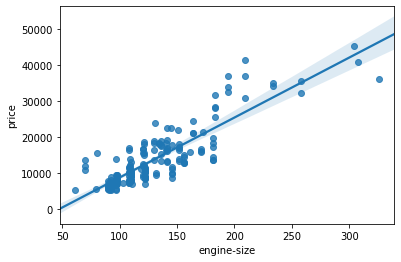

In [11]:
sns.regplot(d['engine-size'],d['price'])
#as the scatterplot points are close, I believe the correlation between 'engine-price' and 'price' is considerably high

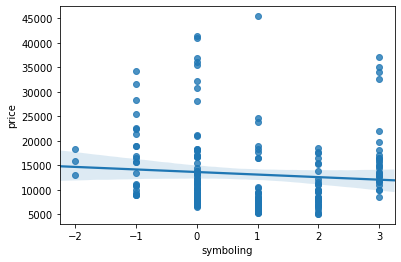

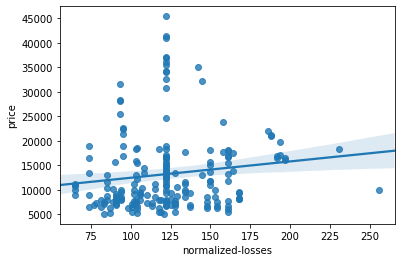

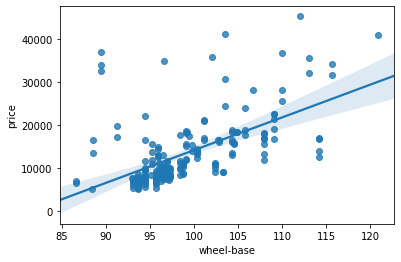

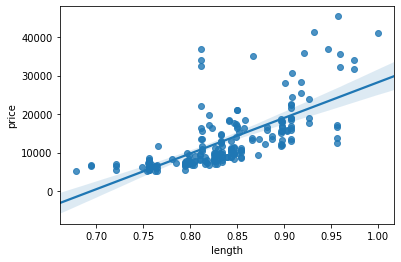

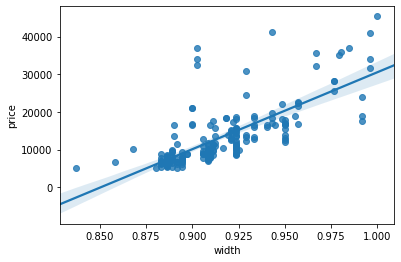

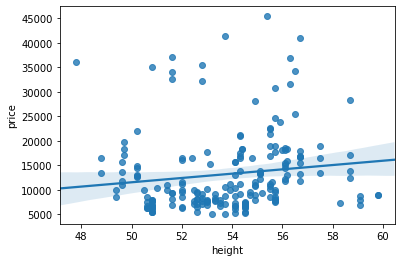

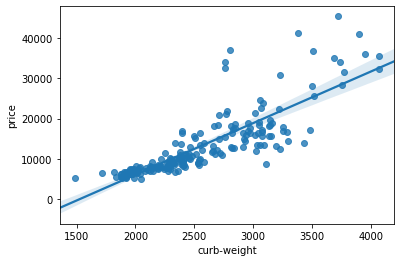

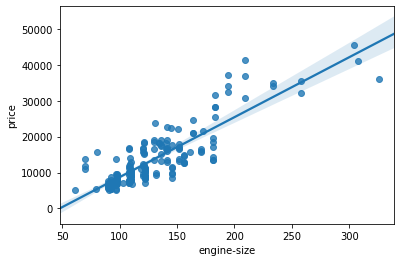

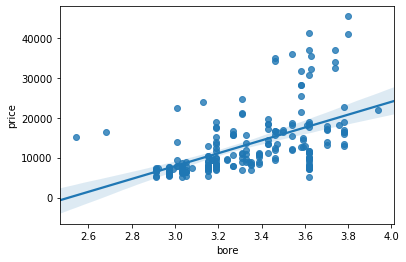

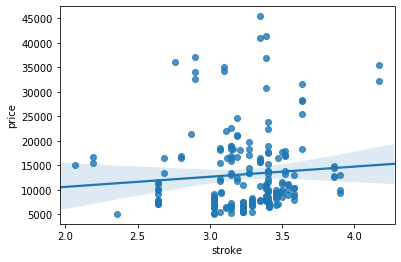

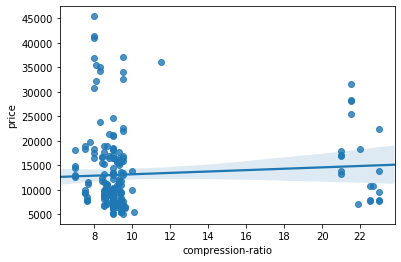

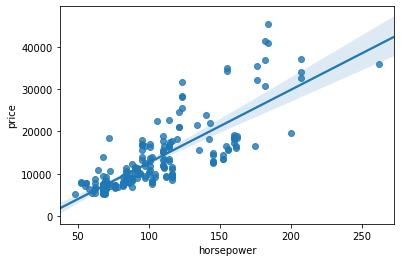

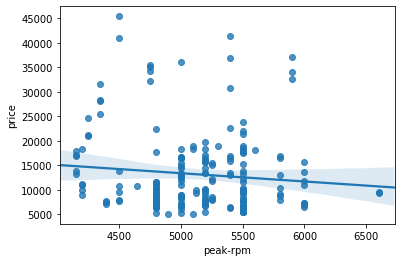

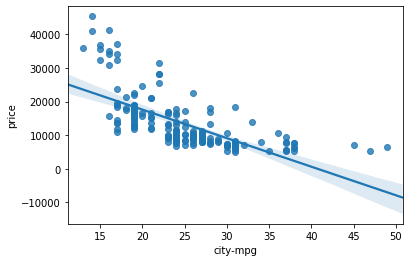

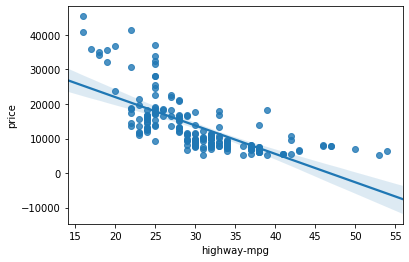

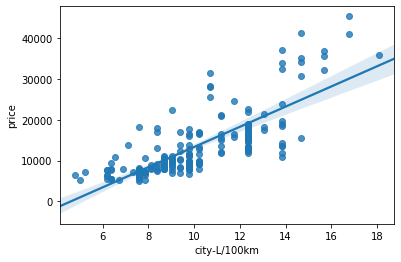

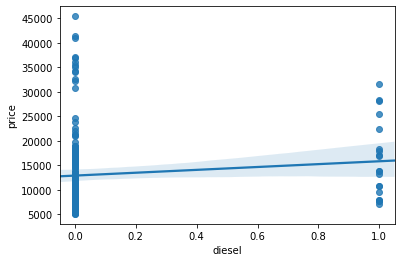

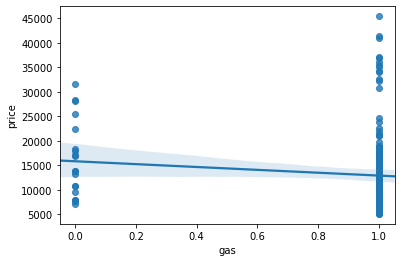

In [12]:
for i in d.describe().columns:
    if i!= 'price':
        sns.regplot(d[i],d['price'])
        plt.show()

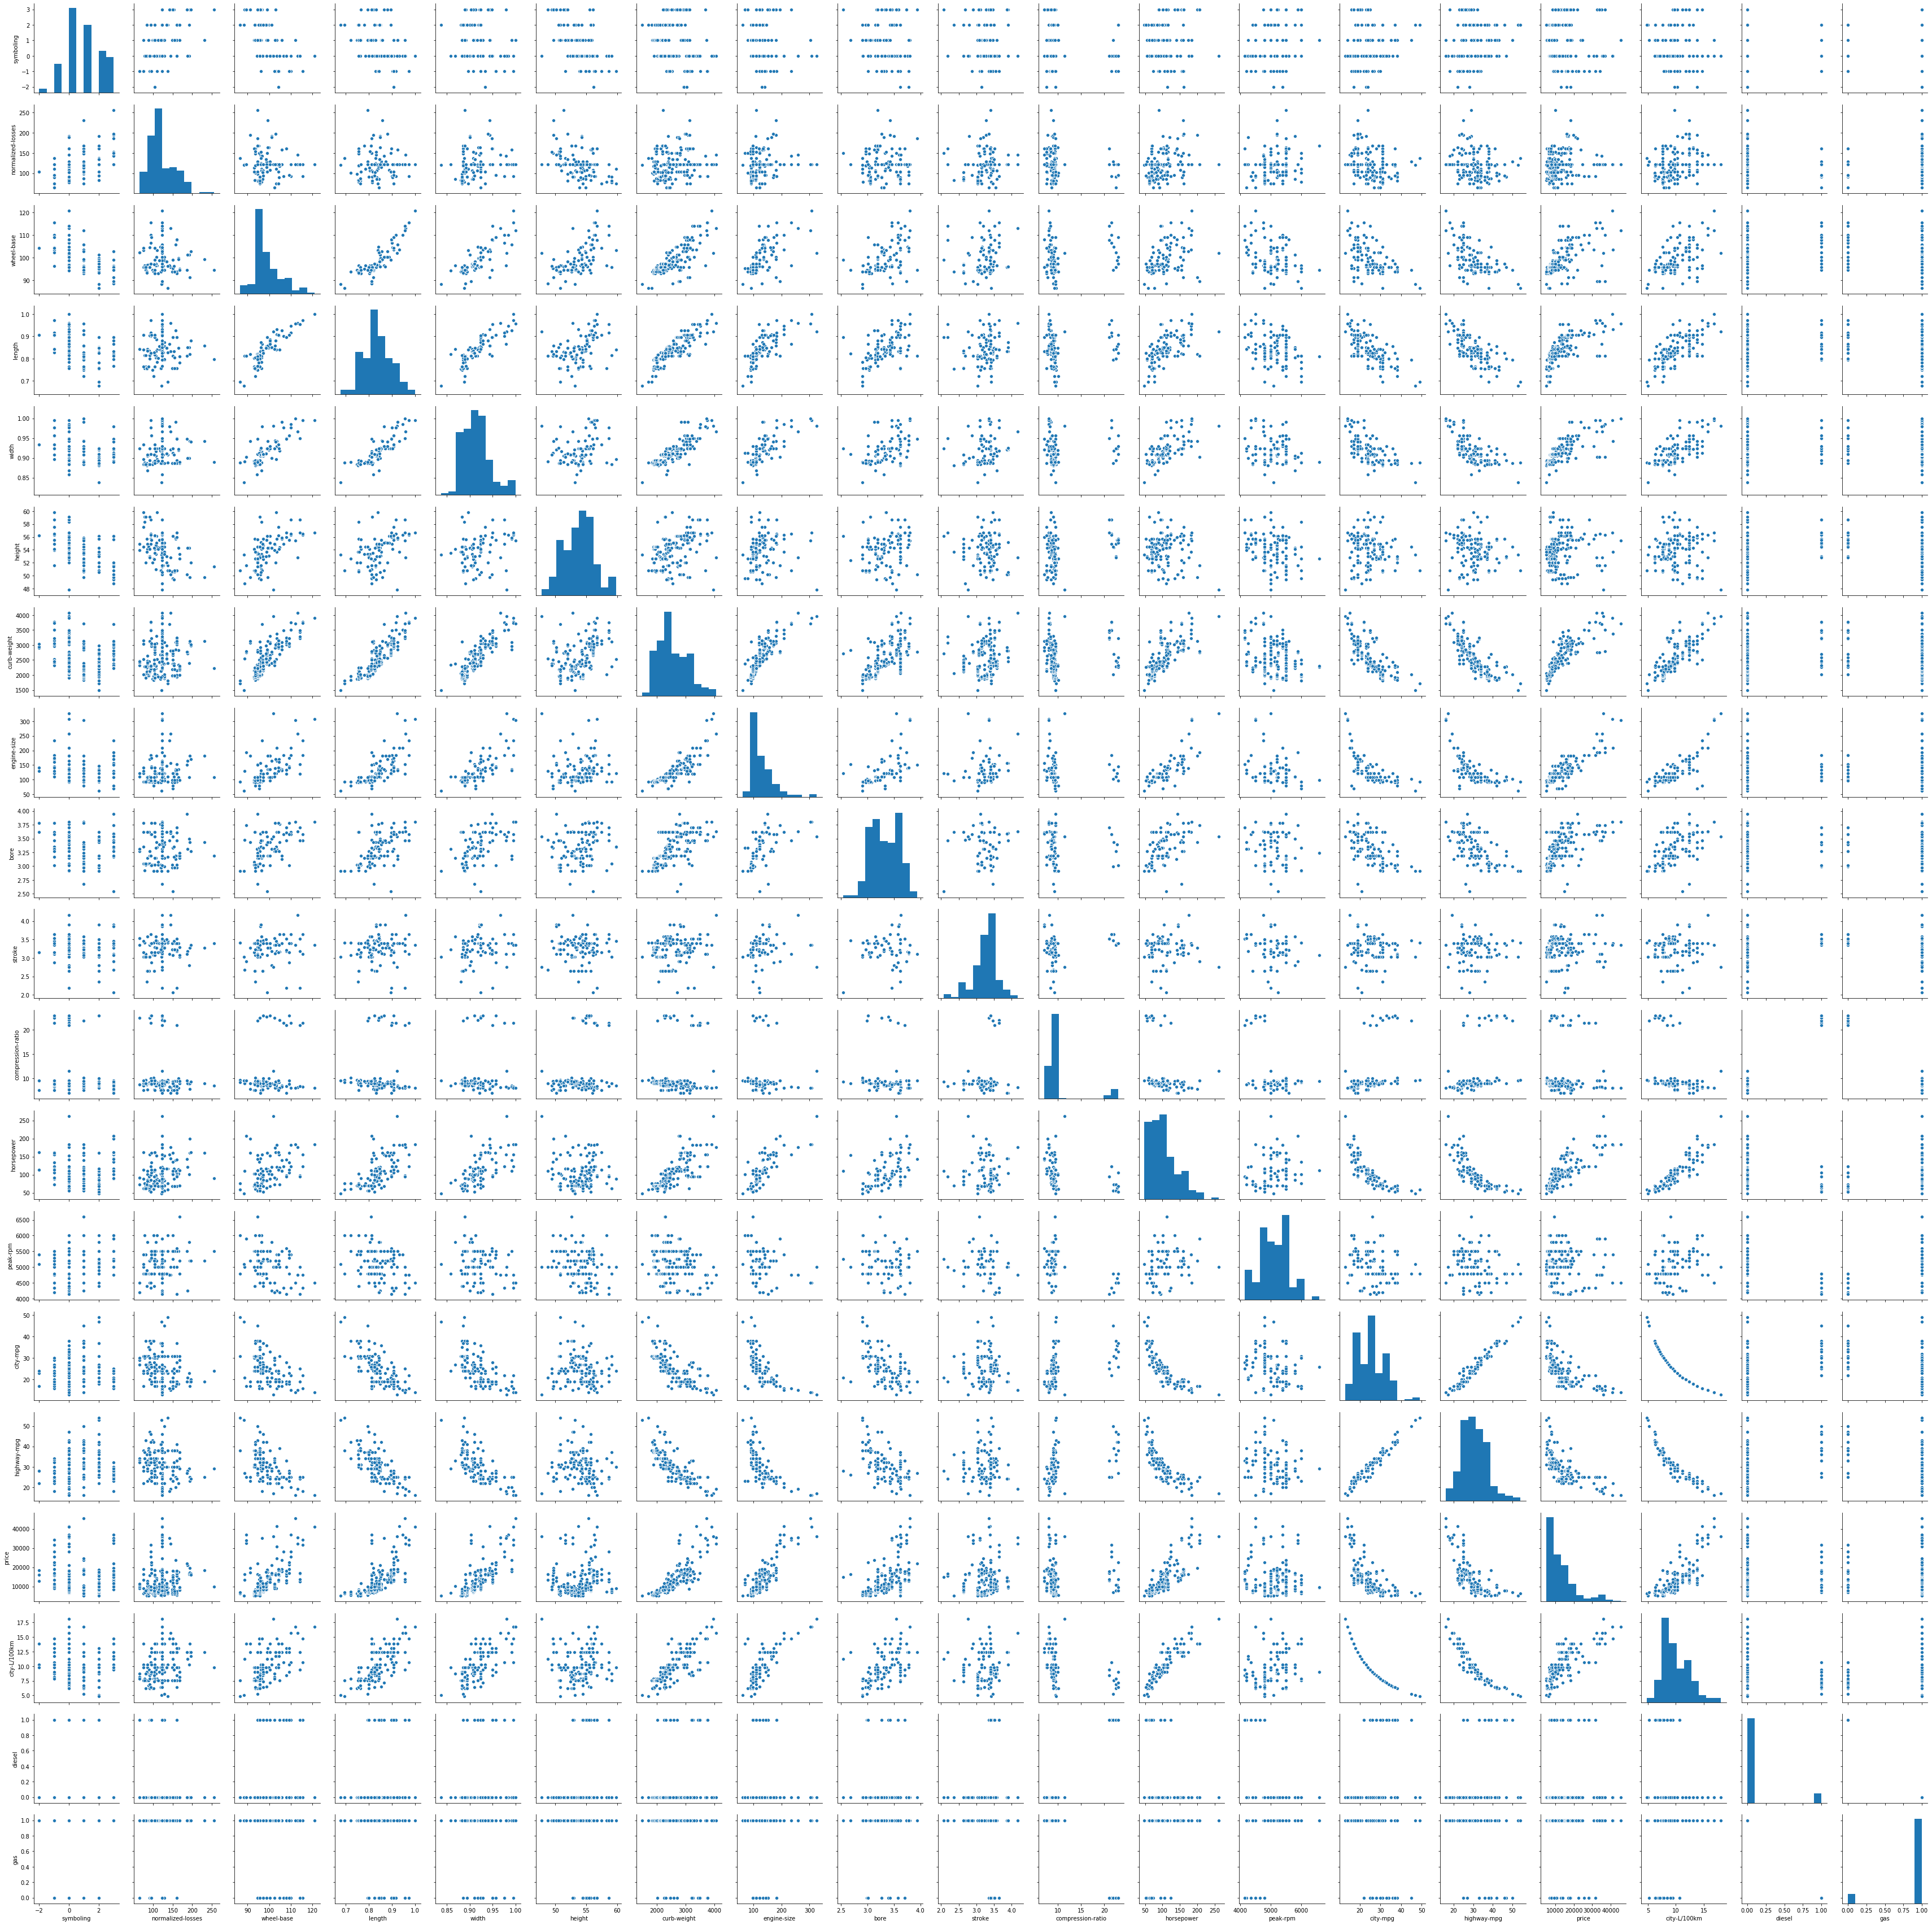

In [17]:
sns.pairplot(d)
plt.show()

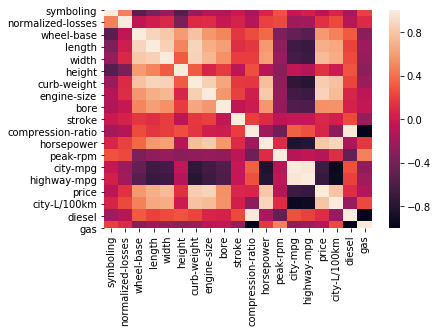

In [18]:
sns.heatmap(cor)
plt.show()

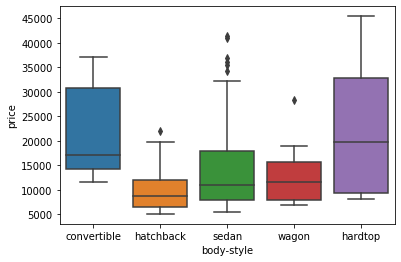

In [19]:
sns.boxplot('body-style','price',data=d)

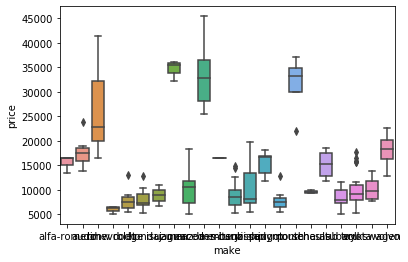

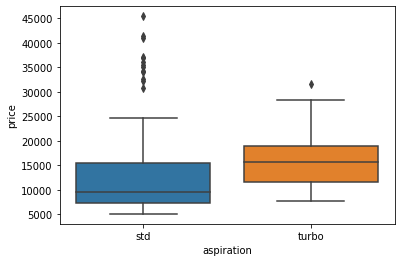

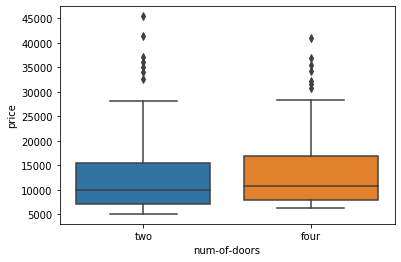

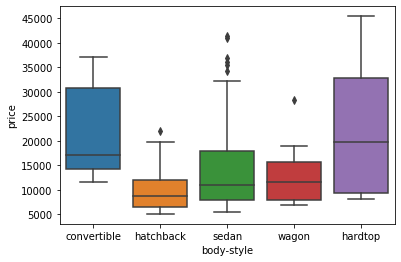

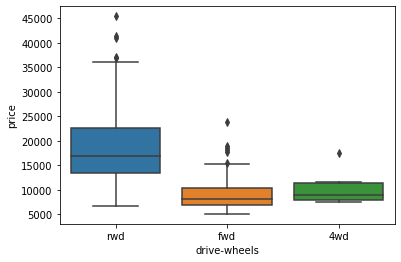

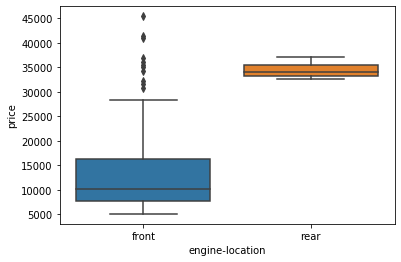

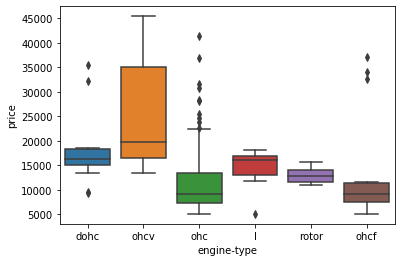

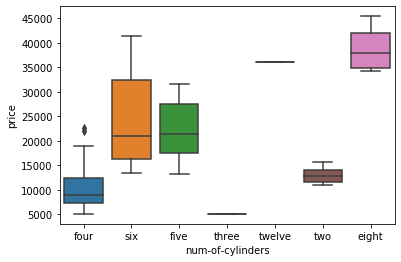

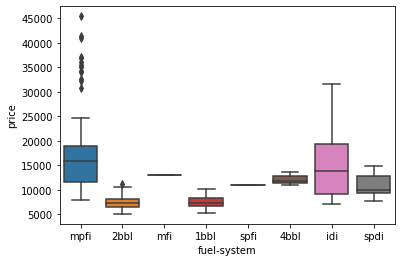

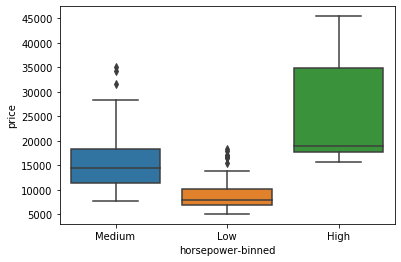

In [21]:
for i in d.describe(include=np.object).columns:
    if i!='price':
        sns.boxplot(d[i],d['price'])
        plt.show()

In [23]:
d.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [24]:
d.describe(include=np.object)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [40]:
for i in d.describe(include=np.object).columns:
    print()
    print(d[i].value_counts())
    print('\n\n\n')


toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64





std      165
turbo     36
Name: aspiration, dtype: int64





four    115
two      86
Name: num-of-doors, dtype: int64





sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64





fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64





front    198
rear       3
Name: engine-location, dtype: int64





ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64





four      157
six        2

In [41]:
for i in d.describe(include=np.object).columns:
    print(d.groupby(i)['price'].mean())
    print('\n\n\n')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64




aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64




num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64




body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon 

In [42]:
grp= d.groupby(['drive-wheels','body-style'])['price'].mean()
grp

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

In [43]:
grps= d[['drive-wheels','body-style','price']]
pivot = grps.groupby(['drive-wheels','body-style'], as_index=False).mean()
piv= pivot.pivot(index = 'drive-wheels', columns = 'body-style')
piv

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

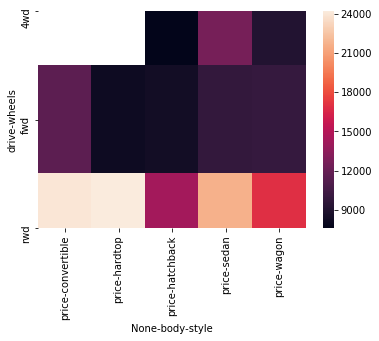

In [44]:
sns.heatmap(piv)
plt.show()

In [53]:
cols = d.describe(include=np.object).columns
redundant = []
for i in cols:
    redundant.append(i)
    for j in cols:
        if i==j or j in redundant:
            continue
        else:
            temp = d.groupby([i,j])['price'].mean()
            print(temp, end='\n\n')
            temp = d[[i,j,'price']]
            for_pivot = temp.groupby([i,j], as_index=False).mean()
            piv = for_pivot.pivot(index = i, columns = j)
            piv.replace(np.nan, '-', inplace= True)
            print('Pivot Table')
            print(piv)
            print('------', end='\n\n')

make           aspiration
alfa-romero    std           15498.333333
audi           std           16656.000000
               turbo         23875.000000
bmw            std           26118.750000
chevrolet      std            6007.000000
dodge          std            6900.000000
               turbo          9826.333333
honda          std            8184.692308
isuzu          std            8916.500000
jaguar         std           34600.000000
mazda          std           10652.882353
mercedes-benz  std           38900.000000
               turbo         28394.000000
mercury        turbo         16503.000000
mitsubishi     std            7314.714286
               turbo         11485.666667
nissan         std            9869.588235
               turbo         19699.000000
peugot         std           14649.000000
               turbo         16189.166667
plymouth       std            7004.600000
               turbo         10360.500000
porsche        std           31400.500000
renault 

In [54]:
from scipy.stats import pearsonr
pear, p_val = pearsonr(d['wheel-base'], d['price'])
print(pear, p_val)

0.5846418222655081 8.076488270732989e-20


In [55]:
from scipy import stats
temp1 = d[['drive-wheels', 'body-style','price']]
temp = temp1[['drive-wheels', 'price']].groupby(['drive-wheels'])
temp
f_val, p_val = stats.f_oneway(temp.get_group('fwd')['price'], 
                              temp.get_group('4wd')['price'], 
                              temp.get_group('rwd')['price'])
print(f_val, p_val)

67.95406500780398 3.3945443577151245e-23
